# 1. Import Libraries

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

warnings.filterwarnings("ignore")

np.random.seed(12345)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# 2. Read Data

In [2]:
data = pd.read_excel("banana_dataset.xlsx")

data

,SOIL TYPE,REGION,TEMPERATURE,WEATHER CONDITION,WATER REQUIREMENT
0,DRY,DESERT,10-20,NORMAL,8.75
1,DRY,DESERT,10-20,SUNNY,10.25
2,DRY,DESERT,10-20,WINDY,9.65
3,DRY,DESERT,10-20,RAINY,0.75
4,DRY,DESERT,20-30,NORMAL,9.85
...,...,...,...,...,...
187,WET,HUMID,30-40,RAINY,0.10
188,WET,HUMID,40-50,NORMAL,5.15
189,WET,HUMID,40-50,SUNNY,6.65
190,WET,HUMID,40-50,WINDY,6.15


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SOIL TYPE          192 non-null    object 
 1   REGION             192 non-null    object 
 2   TEMPERATURE        192 non-null    object 
 3   WEATHER CONDITION  192 non-null    object 
 4   WATER REQUIREMENT  192 non-null    float64
dtypes: float64(1), object(4)
memory usage: 7.6+ KB


### 3.1.2. Remove Missing Values (Listwise Deletion)

In [4]:
# no NaN to remove
# data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [5]:
data.describe()

,WATER REQUIREMENT
count,192.000000
mean,5.935599
std,3.653985
min,0.100000
25%,2.937500
50%,6.600000
75%,8.700000
max,13.250000


### 3.2.2. Remove Outliers

In [6]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [7]:
target_name = "WATER REQUIREMENT"
feature_name = list(data.columns.drop(target_name))

In [8]:
X = data[feature_name]
y = data[target_name]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

In [10]:
numerical_feature = []
categorical_feature = ["SOIL TYPE", "REGION", "TEMPERATURE", "WEATHER CONDITION"]

In [11]:
for feature in categorical_feature:
    print(feature, ":", np.unique(X_train[feature]))

SOIL TYPE : ['DRY' 'HUMID' 'WET']
REGION : ['DESERT' 'HUMID' 'SEMI ARID' 'SEMI HUMID']
TEMPERATURE : ['10-20' '20-30' '30-40' '40-50']
WEATHER CONDITION : ['NORMAL' 'RAINY' 'SUNNY' 'WINDY']


In [12]:
ordinal_feature = ["SOIL TYPE", "REGION", "TEMPERATURE"]
nominal_feature = ["WEATHER CONDITION"]

## 5.1. Ordinal Encoding

### 5.1.1. Training Set

In [13]:
categories = [
    np.array(["DRY", "HUMID", "WET"], dtype=object),
    np.array(["DESERT", "SEMI ARID", "SEMI HUMID", "HUMID"], dtype=object),
    np.array(["10-20", "20-30", "30-40", "40-50"], dtype=object),
]

In [14]:
ordinal_encoder = OrdinalEncoder(categories=categories)
X_train[ordinal_feature] = ordinal_encoder.fit_transform(X_train[ordinal_feature])

### 5.1.2. Test Set

In [15]:
X_test[ordinal_feature] = ordinal_encoder.transform(X_test[ordinal_feature])

## 5.2. One Hot Encoding

### 5.2.1. Training Set

In [16]:
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
one_hot_encoder.fit(X_train[nominal_feature])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [17]:
one_hot_feature = []
for i, feature in enumerate(nominal_feature):
    for cate in one_hot_encoder.categories_[i]:
        one_hot_feature_name = str(feature) + "_" + str(cate)
        one_hot_feature.append(one_hot_feature_name)

In [18]:
X_train[one_hot_feature] = one_hot_encoder.transform(X_train[nominal_feature])
X_train.drop(nominal_feature, axis=1, inplace=True)

### 5.2.2. Test Set

In [19]:
X_test[one_hot_feature] = one_hot_encoder.transform(X_test[nominal_feature])
X_test.drop(nominal_feature, axis=1, inplace=True)

## 5.3. Feature Scaling

### 5.3.1. Training Set

In [20]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [21]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [22]:
reg = MLPRegressor(
    hidden_layer_sizes=(3, 2),
    activation="relu",
    solver="sgd",
    alpha=0,
    batch_size=X_train_scaled.shape[0],
    learning_rate_init=0.01,
    max_iter=1000,
    momentum=0,
)

## 6.2. Train Model

In [23]:
reg.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0, batch_size=153, hidden_layer_sizes=(3, 2),
             learning_rate_init=0.01, max_iter=1000, momentum=0, solver='sgd')

## 6.3. Loss curve

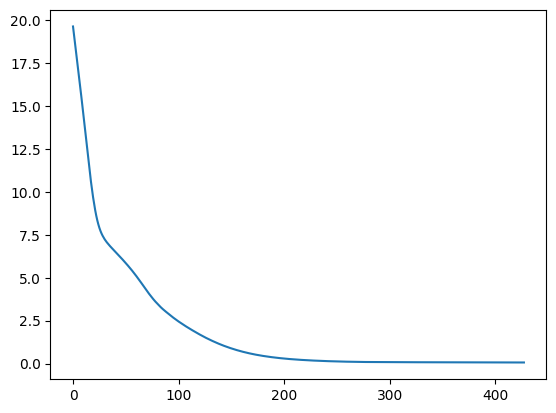

In [24]:
plt.plot(reg.loss_curve_)

## 6.4. Model's Weight & Bias

In [25]:
reg.coefs_

[array([[-0.75825957, -0.82673172,  0.59780482],
        [-0.69508759, -0.65448656, -0.29486255],
        [ 0.63320428, -0.51517979, -0.54636061],
        [ 0.40350816,  0.14284234, -0.32518394],
        [-1.39180608,  0.01521963, -0.13760225],
        [ 0.72557202,  0.01904094, -0.34194825],
        [ 0.60821048, -0.48231166,  0.62546785]]),
 array([[ 2.15347553,  0.00396755],
        [-0.83971175, -0.28910198],
        [-0.12210462,  0.22707868]]),
 array([[ 2.1539754 ],
        [-0.32620154]])]

In [26]:
reg.intercepts_

[array([ 1.34449034,  0.06895019, -0.73693831]),
 array([-0.00146466,  0.75129698]),
 array([0.9512288])]

# 7. Prediction

## 7.1. Training Set

In [27]:
y_pred_train = reg.predict(X_train_scaled)

## 7.2. Test Set

In [28]:
y_pred_test = reg.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Scoring

In [29]:
print("r2_score =\t\t\t", r2_score(y_train, y_pred_train))
print("mean_squared_error =\t\t", mean_squared_error(y_train, y_pred_train))
print("mean_absolute_error =\t\t", mean_absolute_error(y_train, y_pred_train))
print(
    "mean_absolute_percentage_error =",
    mean_absolute_percentage_error(y_train, y_pred_train),
)

r2_score =			 0.9911026677108178
mean_squared_error =		 0.1240767765391171
mean_absolute_error =		 0.25521763991742713
mean_absolute_percentage_error = 0.620371409378703


### 8.1.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

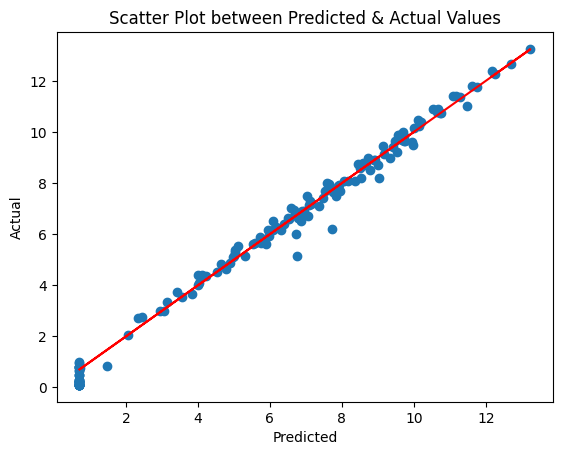

In [30]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color="red")

plt.title("Scatter Plot between Predicted & Actual Values")
plt.xlabel("Predicted")
plt.ylabel("Actual")

## 8.2. Test Set

### 8.2.1. Scoring

In [31]:
print("r2_score =\t\t\t", r2_score(y_test, y_pred_test))
print("mean_squared_error =\t\t", mean_squared_error(y_test, y_pred_test))
print("mean_absolute_error =\t\t", mean_absolute_error(y_test, y_pred_test))
print(
    "mean_absolute_percentage_error =",
    mean_absolute_percentage_error(y_test, y_pred_test),
)

r2_score =			 0.9838915391658599
mean_squared_error =		 0.17112486317992828
mean_absolute_error =		 0.2887464913351495
mean_absolute_percentage_error = 0.28735429316487454


### 8.2.2 Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

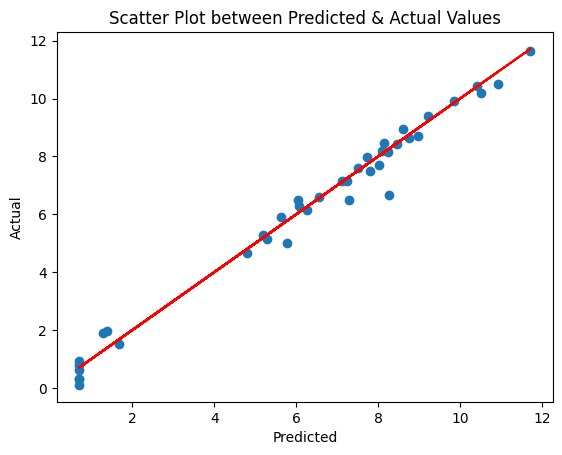

In [32]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color="red")

plt.title("Scatter Plot between Predicted & Actual Values")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# 9. Save Model

In [33]:
import pickle

In [34]:
pickle.dump(
    (
        reg,
        ordinal_encoder,
        one_hot_encoder,
        feature_name,
        numerical_feature,
        ordinal_feature,
        nominal_feature,
    ),
    open("banana_model.pickle", "wb"),
)